In [1]:
import pickle
import numpy as np
import pandas as pd

In [4]:
import pickle
import numpy as np

num = 18

data_dir = "/Users/samskanderi/Documents/Research_Project/SWANSF/code/results/"
model_name = ['LSTM','1DCNN','RNN','GRU']
ousampling_name = ['','RusTomekSmote_WithoutB&C_','RusTomekAdasyn_WithoutB&C_']

values = np.zeros((12,10,12))
names = []
count = 0
for name in model_name:
    for s_name in ousampling_name:
        with open(data_dir + name + '_' + s_name + 'Concatenation_Results' + ".pkl", 'rb') as f:
            values[count,:,:]=np.array(pickle.load(f))
        if s_name == '':
            names.append(name)
        else:
            names.append( name+ ' (' + s_name.split('_')[0] + ')' )
        count += 1

In [5]:
all_tss = values[:,:,6]
all_recall = values[:,:,10]
all_precision = values[:,:,11] 
all_hss1 = values[:,:,7]

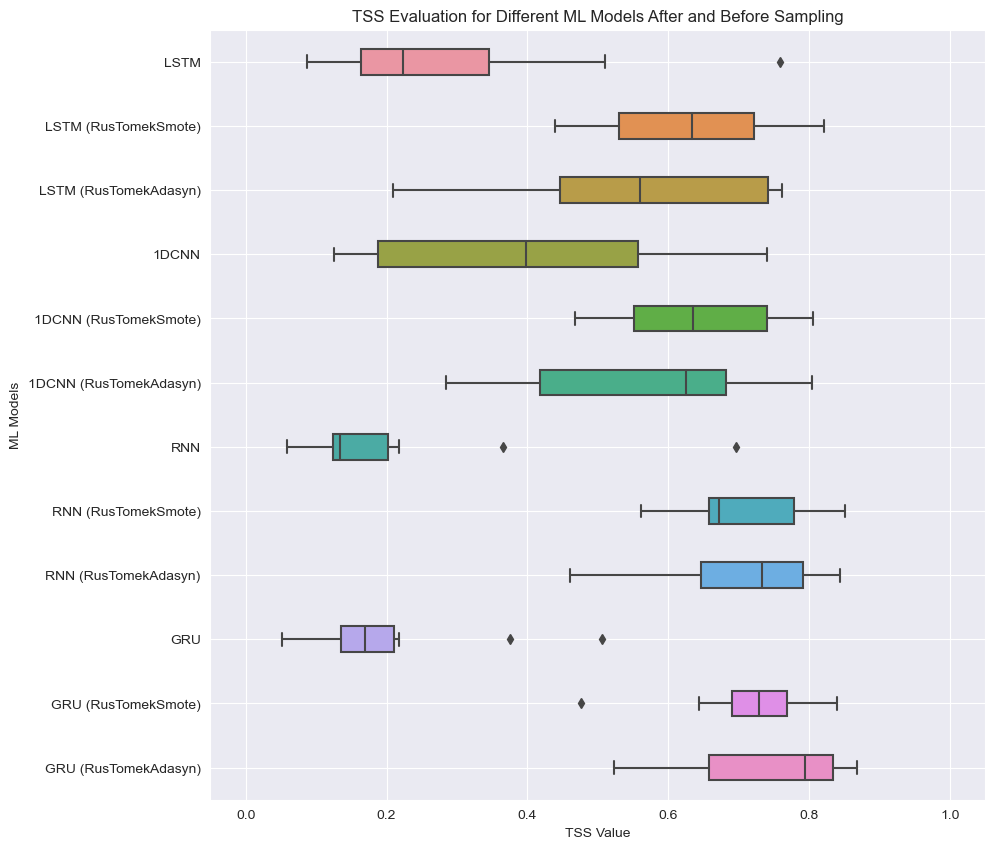

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")


import pandas as pd
df = pd.DataFrame(all_tss.reshape(-1, 1), columns=["TSS"])
df["Model"] = np.repeat(names, all_tss.shape[1])
df["TrainTestCombo"] = np.tile(np.arange(all_tss.shape[1]), all_tss.shape[0])


# Create a beautiful violin plot with Seaborn
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="TSS", y="Model", width=0.4)

# Customize the plot
plt.title("TSS Evaluation for Different ML Models After and Before Sampling")
plt.xlabel("TSS Value")
plt.ylabel("ML Models")
plt.grid(axis="y")

ax = plt.gca()
ax.set_xlim(-.05, 1.05)  # Set x-axis limits
# Show the plot
plt.show()


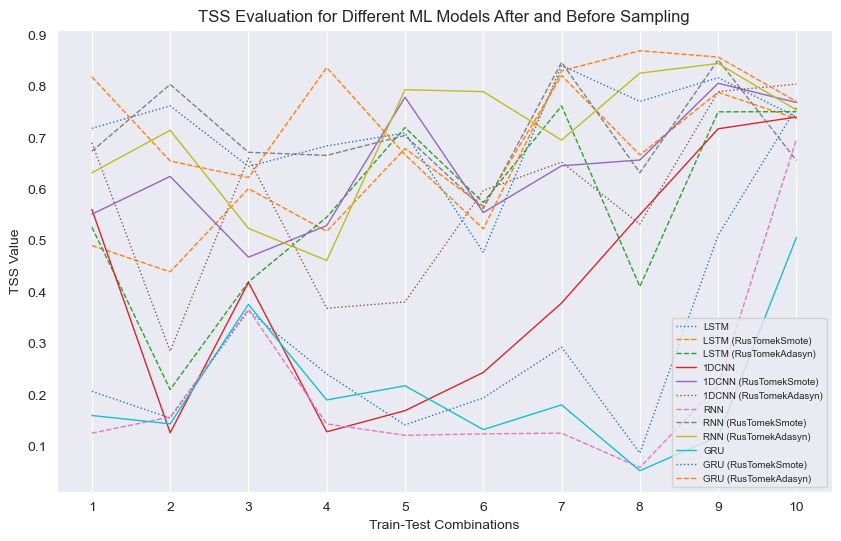

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


import pandas as pd

df = pd.DataFrame(all_tss, columns=[str(i) for i in range(1, all_tss.shape[1] + 1)])

# Create a beautiful violin plot with Seaborn
plt.figure(figsize=(10, 6))
for i in range(0, df.shape[0]):
    if i % 5 == 0:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle=':', linewidth=1)
    elif i % 5 == 1 or i % 5 == 2:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle='--', linewidth=1)
    elif i % 5 == 3 or i % 5 == 4:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle='-', linewidth=1)


# Customize the plot
plt.title("TSS Evaluation for Different ML Models After and Before Sampling")
plt.xlabel("Train-Test Combinations")
plt.ylabel("TSS Value")
plt.grid(axis="y")

# Show the plot
plt.legend(fontsize='x-small')

plt.show()


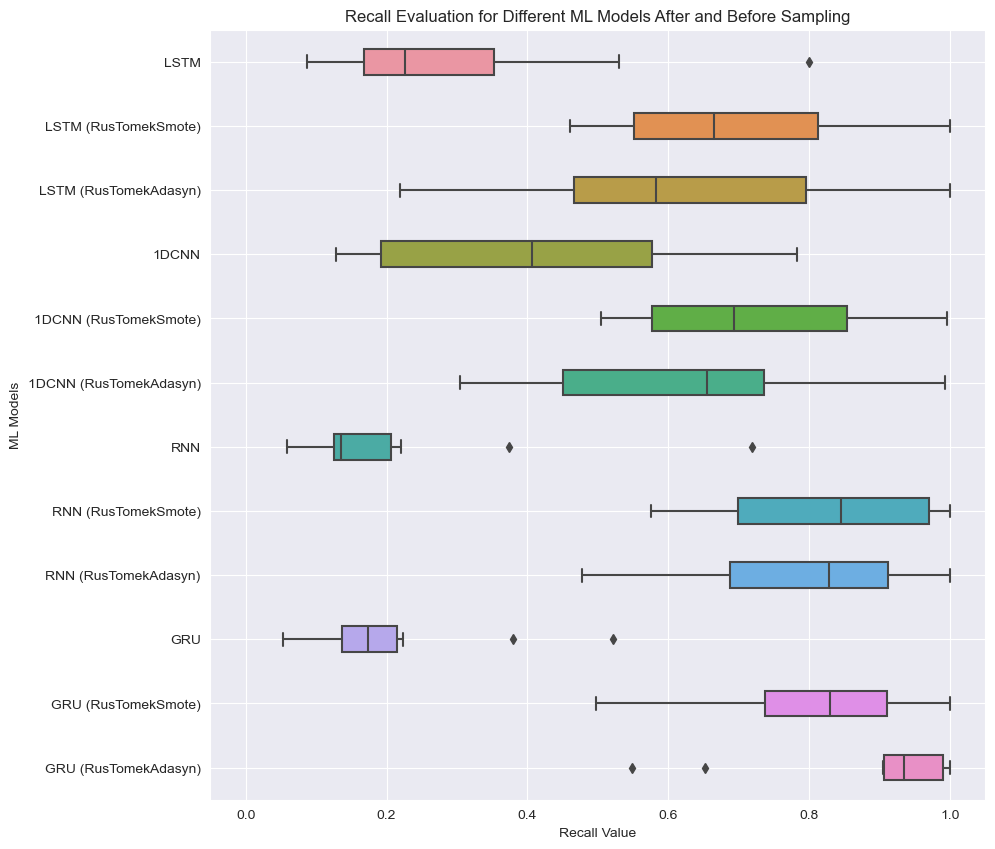

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")



import pandas as pd
df = pd.DataFrame(all_recall.reshape(-1, 1), columns=["Recall"])
df["Model"] = np.repeat(names, all_recall.shape[1])

# Create a beautiful violin plot with Seaborn
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="Recall", y="Model", width=.4)

# Customize the plot
plt.title("Recall Evaluation for Different ML Models After and Before Sampling")
plt.xlabel("Recall Value")
plt.ylabel("ML Models")
plt.grid(axis="y")

ax = plt.gca()
ax.set_xlim(-.05, 1.05)  # Set x-axis limits

# Show the plot
plt.show()


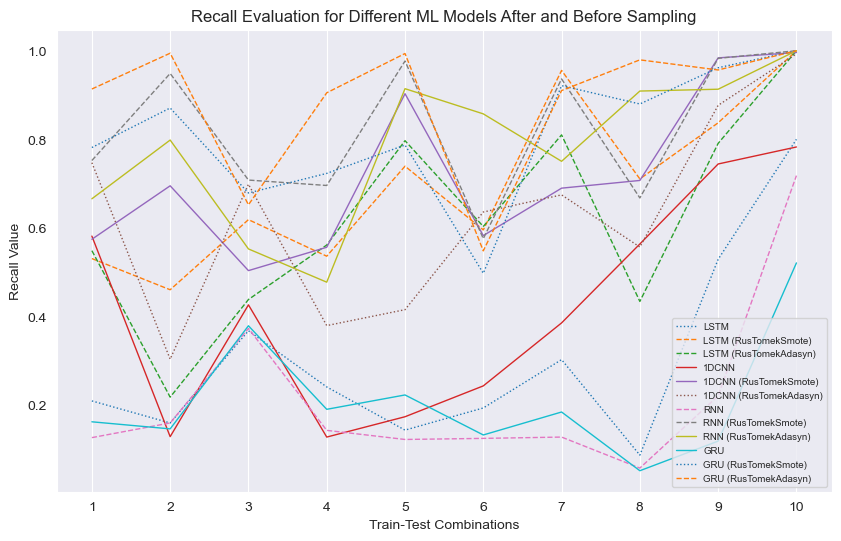

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import pandas as pd

df = pd.DataFrame(all_recall, columns=[str(i) for i in range(1, all_recall.shape[1] + 1)])

# Create a beautiful violin plot with Seaborn
plt.figure(figsize=(10, 6))
for i in range(0, df.shape[0]):
    if i % 5 == 0:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle=':', linewidth=1)
    elif i % 5 == 1 or i % 5 == 2:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle='--', linewidth=1)
    elif i % 5 == 3 or i % 5 == 4:
        sns.lineplot(data=df.iloc[i], dashes=True, label=names[i], linestyle='-', linewidth=1)


# Customize the plot
plt.title("Recall Evaluation for Different ML Models After and Before Sampling")
plt.xlabel("Train-Test Combinations")
plt.ylabel("Recall Value")
plt.grid(axis="y")


# Show the plot
plt.legend(fontsize='x-small')
plt.show()


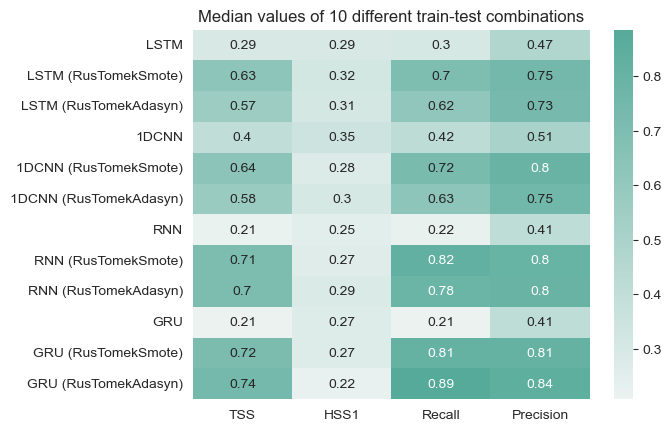

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (2D matrix)
values = {
    'TSS' : np.nanmean(all_tss, axis=1),
    
    'HSS1' : np.nanmean(all_hss1, axis=1),
    
    'Recall' : np.nanmean(all_recall, axis=1),
    
    'Precision' : np.nanmean(all_precision, axis=1)
    
}

values = pd.DataFrame(values)


custom_colormap = sns.color_palette("light:#5A9", as_cmap=True)

# Create the heatmap
sns.heatmap(values, annot=True, cmap=custom_colormap, yticklabels=names)

plt.title("Median values of 10 different train-test combinations")

# Display the plot
plt.show()

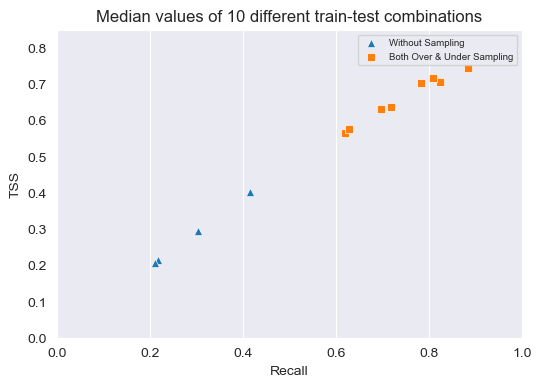

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("darkgrid")

values = {
    'Y' : np.nanmean(all_tss, axis=1),
    
    'X' : np.nanmean(all_recall, axis=1),
    
    'Class' : ['Without Sampling', 'Both Over & Under Sampling','Both Over & Under Sampling',
               'Without Sampling', 'Both Over & Under Sampling','Both Over & Under Sampling',
               'Without Sampling', 'Both Over & Under Sampling','Both Over & Under Sampling',
               'Without Sampling', 'Both Over & Under Sampling','Both Over & Under Sampling',
               ],
}


df = pd.DataFrame(values)

# Create a beautiful violin plot with Seaborn
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df[df['Class'] == 'Without Sampling'], x='X', y='Y', label='Without Sampling', marker='^')

# Plot Class B in red with squares
sns.scatterplot(data=df[df['Class'] == 'Over Sampling'], x='X', y='Y', label='Over Sampling', marker='o')

# Plot Class C in green with triangles
sns.scatterplot(data=df[df['Class'] == 'Both Over & Under Sampling'], x='X', y='Y', label='Both Over & Under Sampling', marker='s')


# Customize the plot
plt.title("Median values of 10 different train-test combinations")
plt.xlabel("Recall")
plt.ylabel("TSS")

ax = plt.gca()
ax.set_xlim(0, 1)  # Set the x-axis limits from 2 to 7
ax.set_ylim(0, .85)  # Set the y-axis limits from 3 to 8
plt.grid(axis="y")

# Show the plot
plt.legend(fontsize='x-small')

plt.show()
